# Character-level RNN for beer.stackoverflow.com

## How does an RNN work?

**1. Gather and clean training data:**

In [1]:
from xml.etree import cElementTree as ET
import sys
from HTMLParser import HTMLParser
import time

# credit: http://stackoverflow.com/questions/753052/strip-html-from-strings-in-python
class MLStripper(HTMLParser):
    def __init__(self):
        self.reset()
        self.fed = []
    def handle_data(self, d):
        self.fed.append(d)
    def get_data(self):
        return ''.join(self.fed)

def strip_tags(html):
    s = MLStripper()
    s.feed(html)
    return s.get_data()

posts = open('Posts.xml', 'r').read()

posts[1:100]

def remove_tags(text):
    return ''.join(ET.fromstring(text).itertext())

root = ET.fromstring(posts)
documents = []
t0 = time.time()
for child in root.findall('row'):
    text = None
    child_text = child.get('Body').encode('utf-8').strip()
    text = strip_tags(child_text)
    # Remove line breaks so posts are grouped together
    text = text.replace("\n","")
    documents.append(text)
t1 = time.time()    

print 'Time to parse text: ' + str(t1 - t0)
print documents[0:2]
print 'Total number of documents: ' + str(len(documents))

Time to parse text: 0.178838968277
['I was offered a beer the other day that was reportedly made with citra hops. What are citra hops? Why should I care that my beer is made with them?', 'As far as we know, when did humans first brew beer, and where? Around when would you have been able to get your hands on something resembling a modern lager?']
Total number of documents: 1694


**2. Create dictionaries mapping characters to integers and back again.**

In [18]:
all_posts = ("\n\n\n").join(documents[0:10])

print all_posts[0:1000]

data = all_posts
chars = list(set(data))
data_size, vocab_size = len(data), len(chars)
print 'data has %d characters, %d unique.' % (data_size, vocab_size)
char_to_ix = { ch:i for i,ch in enumerate(chars) }
ix_to_char = { i:ch for i,ch in enumerate(chars) }

I was offered a beer the other day that was reportedly made with citra hops. What are citra hops? Why should I care that my beer is made with them?


As far as we know, when did humans first brew beer, and where? Around when would you have been able to get your hands on something resembling a modern lager?


How is low/no alcohol beer made? I'm assuming that the beer is made normally and the alcohol is then removed, is it any more than just boiling it off? I've noticed that no/low alcohol beers' taste improved hugely a few years ago, is this due to a new technique?


Citra is a registered trademark since 2007. Citra Brand hops have fairly high alpha acids and total oil contents with a low percentage of cohumulone content and  imparts interesting citrus and tropical fruit characters to beer.For more information, you can read the Wikipedia article on the Citra brand.


In general, what's the best way to work out the temperature at which to serve a particular beer? Room temperature? Cold?

**3. Train**

1. Initialize randomized weights for each neuron
2. Backpropagate a loss for those weights, using a target class of the next character
3. Update weights via Adagrad

In [19]:
execfile('simple_rnn.py')
import time

max_iters = 20000
start = time.time()
results = train(data, vocab_size, max_iters)
losses = results['losses']
h = results['hidden_state']
end = time.time()
print "Training for " + str(max_iters) + " iterations lasted for " + str(end - start) + " seconds."

Training for 20000 iterations lasted for 30.5917339325 seconds.


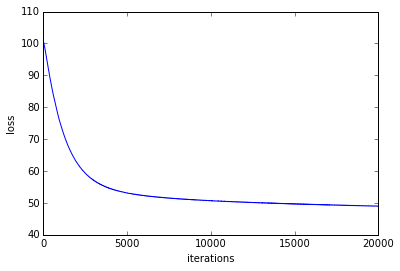

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('iterations')
plt.show()

In [22]:
nsamples = 1000
bidx = char_to_ix['l']
samples = sample(h, bidx, nsamples)
#unicode('\x80abc', errors='ignore')
("").join([unicode(ix_to_char[samples[i]], errors = 'ignore') for i in range(nsamples)])

u"le sorede? A2\n\nI'cout berth oit  Bul I thor. Mis atr ber co tho tat cart wiar cat?\n\nHisty thes ole amnoAs uthout no tretrtere: sorestrovo BVe bee I grarn wI th toit way out ing!he s anat on vera I'und Whe belily thut woly atucice ders igle  as hake satrere?\n\n\nTrovay. WBerd una nifferker Ily?\n\n\nCfarcorlcoh, anf? Doeno ala angetiduy int are co the a lalant at titt oicsumo bite?n, /nothed alally matha fartice: mofarerad mangers tangore berangthe at atidisk, moir sBmts at is ding lar w(are lI gere I\n hald ist to the andimg pritPure I parteredn irte as ta alplece hid thtiquace ain wovemphaling lot ha irerint beem de  ffat? pDould woco t'wro Cipof aldecok wrerrarn anderemiteicild lidtt wingo oh?\n\n\nCVrar.\n\n\nAst Cuily oh soly 20?\n\n\n07\n\n\n\nIs't.\n\n'Qu thendFove thaly dmamoh the marenir IPWB7.ved beer whoy tad boh? Whf?\n\n\nI dier or, dlutly mhceredsy? As rerertry mofky anes arat offwe (phat Is thaty wars\na Courere: mow cromat wacras hafit ince cemucpol and chatera a 